TODO

- Provjeriti dal je na politics apply-an lemmatizer (nije)
- Zašto su svi politics tokeni u prvom clusteru (svih 107 usera)



###### Should always be run

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/p2p tokenizer/

/content/drive/MyDrive/Colab Notebooks/p2p tokenizer


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

wnl = WordNetLemmatizer()
lem = lambda word: wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### Prep


##### General tokenizer

In [ ]:
import json
from tokenization import FullTokenizer
from collections import Counter

In [ ]:
tokenizer = FullTokenizer("vocab.txt", True)

In [ ]:
Counter(tokenizer.tokenize("This is my sample sentecnce."))

Counter({'this': 1,
         'is': 1,
         'my': 1,
         'sample': 1,
         'sent': 1,
         '##ec': 1,
         '##nce': 1,
         '.': 1})

In [ ]:
with open("nba.txt") as n, open("politics.txt") as p:
  nba_comments = " ".join(json.loads(row)["comment"] for row in n)
  politics_comments = " ".join(json.loads(row)["comment"] for row in p)

In [ ]:
all_comments = nba_comments + ' ' + politics_comments

In [ ]:
len(set_diff)

NameError: ignored

In [ ]:
len(politics_tokens)

In [ ]:
politics_comments[:40]

##### NBA (its actually all, not just NBA)

###### Small Tokenizer

In [ ]:
tokenized = tokenizer.tokenize(all_comments)

In [ ]:
c = Counter(tokenized).most_common(500)

In [ ]:
for i in c:
  if i[0] == "[UNK]":
    print(i)
    break
else:
  print("Not found")

In [ ]:
small_vocab = "\n".join(key for key, value in c)

with open('small_vocab.txt', 'w') as f:
  f.write(small_vocab)

In [ ]:
small_tokenizer = FullTokenizer("small_vocab.txt", True)

###### Testing

In [ ]:
small_tokenizer = FullTokenizer("small_vocab.txt", True)

In [ ]:
nba_tokenized = small_tokenizer.tokenize(nba_comments)

In [ ]:
all_tokens = list(lem(token) for token in Counter(tokenized).keys())
nba_tokens = list(lem(token) for token in Counter(nba_tokenized).keys())

In [ ]:
set_diff = set(all_tokens) - set(nba_tokens)
list(set_diff)[:10]

In [ ]:
clean_token_diff = [i for i in set_diff if "#" not in i]
clean_token_diff[:10]

In [ ]:
word_dict_nba = {len(word): [] for word in nba_tokens}
for word in nba_tokens:
    word_dict_nba[len(word)].append(word)

word_dict_clean = {len(word): [] for word in clean_token_diff}
for word in clean_token_diff:
    word_dict_clean[len(word)].append(word)

In [ ]:
unclean_nba_tokens = [token for token in list(nba_tokens) if "#" in token]

In [ ]:
a = list(nba_tokens)
b = list(clean_token_diff)
c = list(unclean_nba_tokens)
#print_unique(a, b)

#nba_tokens

In [ ]:
print(a[:10])
print(b[:10])
print(c[:10])

In [ ]:
import re

to_rmv = [".", "^", "|"]

for i in to_rmv:
  try:
    c.remove(i)
  except:
    pass

i = 0
not_found_tokens = []
count = 0
for clean in b:
  for reg_token in c:
    i += 1
    if i % 1000000 == 0:
      print(i, len(c) * len(b))

    try:
      if re.match(reg_token.replace("#", ".") + r"\b", clean) is not None:

        # print("1", reg_token, clean)
        break
    except:
      pass
  else:
    count += 1
    not_found_tokens.append(clean)
    # print(clean)


print("Count:", count)

In [ ]:
print(not_found_tokens[:10])

In [ ]:
print(len(a), len(nba_tokens))
print(len(b))
print(len(c))
print(len(not_found_tokens))

In [ ]:
# First 10 tokens marked as UNK that are smaller then 4 characters in length
print(list(i for i in not_found_tokens if 3 < len(i) < 5)[:10])

In [ ]:
atts = ["hi", "#i", "h#"]

# 0 means no matches
print(sum(att in a for att in atts))

In [ ]:
actual_unks = []
for i in not_found_tokens:
  if "[UNK]" in small_tokenizer.tokenize(i):
    actual_unks.append([i, small_tokenizer.tokenize(i)])

In [ ]:
len(actual_unks)

In [ ]:
actual_unks

In [ ]:
small_tokenizer.tokenize("Random nintendo zack")

In [ ]:
print((list([i for i in actual_unks if not i[0].isalnum()])))

In [ ]:
print((list(i for i in Counter(tokenized).most_common(1000) if "#" in i[0])))

In [ ]:
nba_unks = list([i[0] for i in sorted(actual_unks) if i[0].isalnum()])

In [ ]:
nba_word_tokens = [token for token in nba_unks if not any(char.isdigit() for char in token)]

In [ ]:
len(nba_unks) - len(nba_word_tokens)

In [ ]:
[token for token in nba_unks if any(char.isdigit() for char in token)]

In [ ]:
# Store unk tokens in a file
with open('nba_unk_tokens.txt', 'w') as f:
  f.write("\n".join(nba_word_tokens))

In [ ]:
len(nba_word_tokens)

##### Politics

###### Small Tokenizer

In [ ]:
tokenized = tokenizer.tokenize(all_comments)

In [ ]:
c = Counter(tokenized).most_common(500)

In [ ]:
for i in c:
  if i[0] == "[UNK]":
    print(i)
    break
else:
  print("Not found")

In [ ]:
small_vocab = "\n".join(key for key, value in c)

with open('small_vocab.txt', 'w') as f:
  f.write(small_vocab)

In [ ]:
small_tokenizer = FullTokenizer("small_vocab.txt", True)

###### Testing

In [ ]:
small_tokenizer = FullTokenizer("small_vocab.txt", True)

In [ ]:
politics_tokenized = small_tokenizer.tokenize(politics_comments)

In [ ]:
all_tokens = list(lem(token) for token in Counter(tokenized).keys())
politics_tokens = list(lem(token) for token in Counter(politics_tokenized).keys())

In [ ]:
set_diff = set(all_tokens) - set(politics_tokens)
list(set_diff)[:10]

In [ ]:
clean_token_diff = [i for i in set_diff if "#" not in i]

In [ ]:
word_dict_politics = {len(word): [] for word in politics_tokens}
for word in politics_tokens:
    word_dict_politics[len(word)].append(word)

word_dict_clean = {len(word): [] for word in clean_token_diff}
for word in clean_token_diff:
    word_dict_clean[len(word)].append(word)

In [ ]:
unclean_politics_tokens = [token for token in list(politics_tokens) if "#" in token]

In [ ]:
a = list(politics_tokens)
b = list(clean_token_diff)
c = list(unclean_politics_tokens)

In [ ]:
print(a[:10])
print(b[:10])
print(c[:10])

In [ ]:
import re

to_rmv = [".", "^", "|"]

for i in to_rmv:
  try:
    c.remove(i)
  except:
    pass

i = 0
not_found_tokens = []
count = 0
for clean in b:
  for reg_token in c:
    i += 1
    if i % 1000000 == 0:
      print(i, len(c) * len(b))

    try:
      if re.match(reg_token.replace("#", ".") + r"\b", clean) is not None:

        # print("1", reg_token, clean)
        break
    except:
      pass
  else:
    count += 1
    not_found_tokens.append(clean)
    # print(clean)


print("Count:", count)

In [ ]:
not_found_tokens[:10]

In [ ]:
print(len(a), len(politics_tokens))
print(len(b))
print(len(c))
print(len(not_found_tokens))

In [ ]:
# First 10 tokens marked as UNK that are smaller then 4 characters in length
print(list(i for i in not_found_tokens if len(i) < 4)[:10])

In [ ]:
atts = ["ri", "#i", "r#"]

# 0 means no matches
print(sum(att in a for att in atts))

In [ ]:
actual_unks = []
for i in not_found_tokens:
  if "[UNK]" in small_tokenizer.tokenize(i):
    actual_unks.append([i, small_tokenizer.tokenize(i)])

In [ ]:
len(actual_unks)

In [ ]:
small_tokenizer.tokenize("Random sentance using 495 1969 ncaa naughty national 1769")

In [ ]:
small_tokenizer.tokenize("coffee cream in 2014 was op")

In [ ]:
print("Tokens marked as UNK:")
for i in actual_unks:
  print(i[0])

In [ ]:
print((list([i for i in actual_unks if not i[0].isalnum()])))

In [ ]:
print((list(i for i in Counter(tokenized).most_common(1000) if "#" in i[0])))

In [ ]:
politics_unks = list([i[0] for i in sorted(actual_unks) if i[0].isalnum()])

In [ ]:
politics_word_tokens = [token for token in politics_unks if not any(char.isdigit() for char in token)]

In [ ]:
len(politics_unks) - len(politics_word_tokens)

In [ ]:
set(politics_unks) - set(politics_word_tokens)

In [ ]:
[token for token in politics_unks if any(char.isdigit() for char in token)]

In [ ]:
# Store unk tokens in a file
with open('politics_unk_tokens.txt', 'w') as f:
  f.write("\n".join(politics_word_tokens))

In [ ]:
politics_word_tokens[:10]

#### 200 user Simulation

##### Comparations (checkpoint)

In [ ]:
with open('politics_unk_tokens.txt', 'r') as f:
  politics_unk_tokens = f.read().split()

with open('nba_unk_tokens.txt', 'r') as f:
  nba_unk_tokens = f.read().split()

print(f"Politics tokens: { ', '.join(politics_unk_tokens[:5]) }...")
print(f"Nba tokens:      { ', '.join(nba_unk_tokens[:5]) }...")

Politics tokens: abbreviate, abbreviation, abdominal, abduct, abduction...
Nba tokens:      abbreviate, abbreviation, abdominal, abduct, abduction...


###### Strictly same

In [ ]:
print(len(politics_unk_tokens))
print(len(nba_unk_tokens))

8502
8502


In [ ]:
shared_tokens = set(politics_unk_tokens).intersection(set(nba_unk_tokens))

In [ ]:
len(shared_tokens)

8502

In [ ]:
sorted(list(shared_tokens))[:10]

['abbreviate',
 'abbreviation',
 'abdominal',
 'abduct',
 'abduction',
 'abdul',
 'abdullah',
 'ability',
 'abnormality',
 'abolish']

In [ ]:
#politics_tokenizer.tokenize("abdul")

In [ ]:
nba_specific = set(nba_unk_tokens) - shared_tokens
print(sorted(list(nba_specific))[:10])
print(len(nba_specific))

[]
0


In [ ]:
politics_specific = set(politics_unk_tokens) - shared_tokens
print(sorted(list(politics_specific))[:10])
print(len(politics_specific))

[]
0


In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

###### Lemmatization

In [ ]:
lemmatized_politics = set()

wnl = WordNetLemmatizer()
for word in politics_unk_tokens:
   lemmatized_politics.add(wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v"))

In [ ]:
len(politics_unk_tokens), len(lemmatized_politics)

(8502, 8496)

In [ ]:
lemmatized_nba = set()

wnl = WordNetLemmatizer()
for word in nba_unk_tokens:
   lemmatized_nba.add(wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v"))

In [ ]:
len(nba_unk_tokens), len(lemmatized_nba)

(8502, 8496)

In [ ]:
shared_lemm_tokens = lemmatized_politics.intersection(lemmatized_nba)

In [ ]:
len(shared_lemm_tokens)

8496

In [ ]:
nba_lemm_specific = lemmatized_nba - shared_lemm_tokens
politics_lemm_specific = lemmatized_politics - shared_lemm_tokens

In [ ]:
# Execution cca 2 min
for index, i in enumerate(nba_lemm_specific):
  for j in politics_lemm_specific:
    if similar(i, j) > 0.8:
      print(i, j)

  if index % 100 == 0:
    print(f"          {index} / {len(nba_lemm_specific)}")

In [ ]:
wnl.lemmatize("fossils", pos="v")

'fossils'

In [ ]:
# When nba_lemm only contains nba comments and politics_lemm only politic tokens
# nba - 1000, politics 3000, shared 5000 (982, 3021, 5282)

len(nba_lemm_specific), len(politics_lemm_specific), len(shared_lemm_tokens)

(0, 0, 8496)

##### Random partition (based on hash function)
x partitions represending "x networks of users".
Goal is to put all the tokens in one cluster that matches users from same subreddit. (There should not be cluster with 2 users in different subreddits)   

In [ ]:
from collections import defaultdict

In [ ]:
# Load unk lemm tokens
with open('nba_unk_tokens.txt', 'r') as n:
  all_unk_tokens = n.read().split()

In [ ]:
def get_hashed_cluster(_word):
    return hash(_word) % 10

# Main varaible
clusters = defaultdict(list)

# Partitions will include NBA specific, Politics specific and shared tokens
for word in all_unk_tokens:
    clusters["c" + str(get_hashed_cluster(word))].append(word)

In [ ]:
for i, val in clusters.items():
    print(i, "-", ", ".join(val[:10]) + "...")

c4 - abbreviate, abortion, abundance, abundant, accessibility, accident, accountability, accurately, additive, adjustment...
c2 - abbreviation, abrupt, abusive, accustom, acid, acquaintance, active, adaptive, adequate, admiralty...
c8 - abdominal, accessible, acoustic, acquit, activate, adrenaline, aesthetic, affection, aggravate, agile...
c6 - abduct, ability, abruptly, accidental, accommodation, accountable, accredit, accreditation, accuracy, achieve...
c7 - abduction, abdullah, absolute, abu, abuse, accumulation, adaptation, adjoin, administration, adoptive...
c1 - abdul, abolitionist, above, absolutely, academic, account, accountant, achievement, adriatic, adultery...
c3 - abnormality, abolition, aboriginal, abstraction, accession, acclaim, acquire, activation, activist, additional...
c0 - abolish, accomplish, accomplishment, accurate, activism, addict, additionally, adulthood, adventure, affiliate...
c9 - absurd, accidentally, accumulate, accusation, accuse, actively, actual, addi

##### 200 users

In [ ]:
from collections import defaultdict
import json

In [ ]:
with open("nba.txt") as n, open("politics.txt") as p:
    nba_comments = defaultdict(list)
    politics_comments = defaultdict(list)

    for row in n:
        nba_comments[json.loads(row)['author']].append(json.loads(row)['comment'])

    for row in p:
        politics_comments[json.loads(row)['author']].append(json.loads(row)['comment'])

In [ ]:
all_comments = nba_comments.copy()
all_comments.update(politics_comments)

###### Get UNK tokens only

In [ ]:
import nltk
import json
from nltk.stem import WordNetLemmatizer
from tokenization import FullTokenizer
from collections import Counter

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
user_comments = all_comments['AHarshInquisitor']

In [ ]:
# nba_tokenizer = FullTokenizer("nba_vocab.txt", True)
# politics_tokenizer = FullTokenizer("politics_vocab.txt", True)
wnl = WordNetLemmatizer()
merged = " ".join(user_comments)

tokenizer = FullTokenizer("vocab.txt", True)
tokenized = tokenizer.tokenize(merged)
c = Counter(tokenized).most_common(500)

In [ ]:
"""user_tokens_nba = set()

for word in merged.split():
    if nba_tokenizer.tokenize(word) == ["[UNK]"]:
        lem = wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v").lower()
        if lem in nba_tokens:
            user_tokens_nba.add(lem)"""

'user_tokens_nba = set()\n\nfor word in merged.split():\n    if nba_tokenizer.tokenize(word) == ["[UNK]"]:\n        lem = wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v").lower()\n        if lem in nba_tokens:\n            user_tokens_nba.add(lem)'

In [ ]:
"""user_tokens_politics = set()

for word in merged.split():
    if politics_tokenizer.tokenize(word) == ["[UNK]"]:
        lemmed = wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v").lower()
        if lemmed in politics_tokens:
            user_tokens_politics.add(lemmed)"""

'user_tokens_politics = set()\n\nfor word in merged.split():\n    if politics_tokenizer.tokenize(word) == ["[UNK]"]:\n        lemmed = wnl.lemmatize(wnl.lemmatize(word, pos="n"), pos="v").lower()\n        if lemmed in politics_tokens:\n            user_tokens_politics.add(lemmed)'

In [ ]:
def get_user_unk_tokens(user):
    joined_comments = " ".join(all_comments[user])
    return [n for n in nba_unk_tokens if n in joined_comments]

In [ ]:
rels = { user: get_user_unk_tokens(user) for user in [_ for _ in all_comments][:] }
len(rels['BizGilwalker'])

1419

##### The simulation

In [ ]:
import numpy as np

In [ ]:
# Svi UNK Tokeni usera
users200 = rels

# Proizvoljan broj clustera
# U svakom clusteru se nalaze UNK tokeni
# Inicijalno stanje je hash random
clusters = clusters

In [ ]:
# User set could have: "I am working" and UNK token = "work". Func will not count it, but should
def get_user_cluster_index(username):
    user_set = set(users200[username])
    cluster_absolute_count = list(map(lambda cluster: len(set(cluster[1]).intersection(user_set)), clusters.items()))
    # print(cluster_absolute_count)
    return np.argmax(cluster_absolute_count)

In [ ]:
# Da       (+1 vote) - Ako je User u istom clusteru kao i "iniciator" i User ima predloženi token (u svom vokabularu)
# Svejedno (+0 vote) - Ako je User u istom clusteru kao i "iniciator" i User nema predloženi token (u svom vokabularu)
# Svejedno (+0 vote) - Ako User nije u istom clusteru kao i "iniciator" i User nema predloženi token (u svom vokabularu)
# Ne       (-1 vote) - Ako User nije u istom clusteru kao i "iniciator" i User ima predloženi token (u svom vokabularu)

# x     y
# True  True  +1
# True  False  0
# False False  0
# False True  -1

# x y
# 1 1 +1
# 1 0  0
# 0 0  0
# 0 1 -1

# y * 2x - 1
def vote_decision(x: bool, y: bool) -> int:
    return int(y) * (2 * int(x) - 1)

assert vote_decision(True, True) == 1
assert vote_decision(True, False) == 0
assert vote_decision(False, False) == 0
assert vote_decision(False, True) == -1

In [ ]:
def round_of_vote(username, tolerance = 0, batch_size=1):
    user = users200[username]  # All UNKs

    # Nadi User Cluster
    user_cluster_index = get_user_cluster_index(username)

    # Odaberi token za koji se vote-a za transport u taj cluster
    tokens_not_in_cluster = set(user).difference(clusters["c" + str(user_cluster_index)])

    batch_size = min(len(list(tokens_not_in_cluster)), batch_size)
    proposed_tokens = np.random.choice(list(tokens_not_in_cluster), batch_size, False)

    proposed_tokens_dictkeys = [[index for index, cluster in clusters.items() if proposed_token in cluster][0] for proposed_token in proposed_tokens]

    # Svaki user Vote-a batch
    votes = [0] * batch_size
    for _username in users200:
        same_cluster = get_user_cluster_index(_username) == user_cluster_index
        proposed_exist = set(users200[_username]).intersection(set(proposed_tokens))
        has_proposed_all = [proposed_token in proposed_exist for proposed_token in proposed_tokens]

        vote_decisions = [vote_decision(same_cluster, has_proposed) for has_proposed in has_proposed_all]
        votes = list(map(lambda x: sum(x), zip(votes, vote_decisions)))

    # Prebaci tokene u novi patch
    for i, vote in enumerate(votes):
        if vote > -tolerance:
            clusters[proposed_tokens_dictkeys[i]].remove(proposed_tokens[i])
            clusters["c" + str(user_cluster_index)].append(proposed_tokens[i])
            # print("Success")

In [ ]:
total = 8502
[str(int(100 * len(cluster) / total)) for cluster in clusters.values()]

['10', '9', '9', '9', '10', '10', '10', '9', '10', '10']

In [ ]:
from collections import Counter

def purities():
    users_clusters_keys = [get_user_cluster_index(_username) for _username in users200]
    subbreddits = ["politics" if _username in list(politics_comments.keys()) else "nba" for _username in users200]

    #print(users_clusters_keys)
    #print(len(users_clusters_keys), len(subbreddits))
    #print(list(zip(users_clusters_keys, subbreddits)))
    c = Counter(zip(users_clusters_keys, subbreddits))
    return c

In [ ]:
cluster_purities = purities()

In [ ]:
purity_req = 0.8
vote_simulation_count = 200

for _ in range(vote_simulation_count):
    random_username = np.random.choice(list(users200.keys()))
    round_of_vote(random_username, 10, 100)

    #if _ % 200 == 0:
        #print(_)

    if _ % 10 == 0:
        cluster_purities = purities()
        cluster_purities_tpl = [[(i[0][1], i[1]) for i in cluster_purities.items() if i[0][0] == c1] for c1 in range(len(clusters.keys()))]
        print(list(map(lambda y: ((z:=round(y[0] / sum(y), 2)) > purity_req or z < (1-purity_req), z, y[0], y[1]) if len(y) > 1 else y, [list(map(lambda c: c[1], i)) for i in cluster_purities_tpl])))
        print([str(int(100 * len(cluster) / total)) for cluster in clusters.values()])


[[], [], [], [], [], (False, 0.49, 98, 104), [], [], [], (False, 0.4, 2, 3)]
['9', '8', '9', '9', '11', '12', '9', '10', '8', '10']
[(False, 0.48, 95, 104), (False, 0.67, 2, 1), [], [], [], [], [], [], (False, 0.6, 3, 2), []]
['12', '10', '8', '10', '10', '10', '8', '8', '10', '8']
[(False, 0.25, 2, 6), [], (False, 0.53, 88, 78), [], [], [], [2], [], (False, 0.32, 10, 21), []]
['10', '10', '11', '9', '9', '10', '10', '8', '11', '8']
[[], [], [], [], (False, 0.47, 91, 103), [], [], [5], [], (False, 0.5, 4, 4)]
['9', '8', '10', '8', '12', '9', '10', '10', '9', '10']
[[], (False, 0.49, 98, 104), [], [1], [], (False, 0.33, 1, 2), [], [], [], [1]]
['8', '11', '9', '10', '10', '11', '9', '9', '8', '9']


KeyboardInterrupt: ignored

In [ ]:
purities()

Counter({(5, 'nba'): 96,
         (9, 'nba'): 4,
         (5, 'politics'): 100,
         (9, 'politics'): 7})

In [ ]:
cluster_purities = purities()
cluster_purities_tpl = [[(i[0][1], i[1]) for i in cluster_purities.items() if i[0][0] == c1] for c1 in range(len(clusters.keys()))]
print(list(map(lambda y: ((z:=round(y[0] / sum(y), 2)) > purity_req or z < (1-purity_req), z, y[0], y[1]) if len(y) > 1 else y, [list(map(lambda c: c[1], i)) for i in cluster_purities_tpl])))
print([str(int(100 * len(cluster) / total)) for cluster in clusters.values()])

[[], [], [], [], [], (False, 0.49, 96, 100), [], [], [], (False, 0.36, 4, 7)]
['9', '8', '9', '8', '11', '12', '9', '10', '9', '10']


In [ ]:
"""

purity_req = 0.8
vote_simulation_count = 5000

for _ in range(vote_simulation_count):
    random_username = np.random.choice(list(users200.keys()))
    round_of_vote(random_username, 10, 100)

    #if _ % 200 == 0:
        #print(_)

    if _ % 100 == 0:
        cluster_purities = purities()
        cluster_purities_tpl = [[(i[0][1], i[1]) for i in cluster_purities.items() if i[0][0] == c1] for c1 in range(len(clusters.keys()))]
        print(list(map(lambda y: ((z:=round(y[0] / sum(y), 2)) > purity_req or z < (1-purity_req), z, y[0], y[1]) if len(y) > 1 else y, [list(map(lambda c: c[1], i)) for i in cluster_purities_tpl])))
        print([str(int(100 * len(cluster) / total)) for cluster in clusters.values()])


[[1], [1], (False, 0.4, 2, 3), (True, 0.82, 9, 2), (False, 0.21, 9, 33), (False, 0.64, 44, 25), (False, 0.58, 15, 11), (False, 0.29, 2, 5), (False, 0.42, 17, 23), (False, 0.2, 1, 4)]
['9', '10', '10', '9', '9', '9', '10', '9', '10', '9']
[[1], (False, 0.55, 36, 30), [1], [4], (True, 0.1, 3, 27), (False, 0.4, 22, 33), [4], [], (False, 0.75, 3, 1), (False, 0.62, 26, 16)]
['8', '12', '9', '9', '10', '9', '9', '9', '10', '11']
[[], (False, 0.47, 73, 82), [], [], (False, 0.44, 4, 5), (False, 0.23, 6, 20), [], [], [], [17]]
['5', '17', '6', '5', '15', '15', '6', '5', '6', '16']
[[], [1], [], [], (True, 0.92, 72, 6), [2], [], [], [], (False, 0.2, 25, 101)]
['4', '18', '4', '4', '18', '16', '4', '4', '4', '20']
[[], (False, 0.51, 35, 33), [], [], (True, 0.03, 1, 32), (False, 0.27, 12, 32), [], [], [], (True, 0.84, 52, 10)]
['3', '19', '4', '3', '19', '18', '4', '3', '4', '20']
[[], (False, 0.44, 31, 39), [], [], (False, 0.44, 23, 29), (False, 0.32, 14, 30), [], [], [], (False, 0.78, 32, 9)]
['3', '19', '3', '3', '20', '19', '3', '3', '3', '20']
[[], [], [], [], (True, 0.14, 2, 12), (False, 0.51, 98, 95), [], [], [], []]
['2', '18', '3', '3', '21', '20', '3', '3', '3', '20']
[[], (False, 0.72, 53, 21), [], [], (True, 0.1, 3, 26), (False, 0.7, 43, 18), [], [], [], (True, 0.02, 1, 42)]
['2', '20', '3', '2', '21', '20', '3', '2', '3', '20']
[[], (False, 0.48, 29, 32), [], [], (False, 0.48, 29, 32), (False, 0.38, 18, 29), [], [], [], (False, 0.63, 24, 14)]
['2', '21', '2', '2', '21', '20', '2', '2', '2', '20']
[[], (False, 0.51, 21, 20), [], [], (False, 0.51, 18, 17), (False, 0.55, 33, 27), [], [], [], (False, 0.39, 28, 43)]
['2', '21', '2', '2', '21', '20', '2', '2', '2', '21']
[[], [], [], [], (False, 0.48, 100, 107), [], [], [], [], []]
['2', '21', '2', '2', '23', '18', '2', '2', '2', '21']
[[], (False, 0.54, 22, 19), [], [], [1], [50], [], [], [], (False, 0.23, 27, 88)]
['2', '22', '2', '2', '21', '19', '2', '2', '2', '22']
[[], [], [], [], (False, 0.42, 39, 54), (False, 0.4, 34, 51), [], [], [], (True, 0.93, 27, 2)]
['1', '21', '2', '1', '23', '21', '2', '2', '2', '20']
[[], [5], [], [], (False, 0.22, 22, 77), (True, 0.89, 67, 8), [], [], [], (False, 0.21, 6, 22)]
['1', '21', '2', '1', '23', '20', '2', '2', '2', '21']
[[], [6], [], [], (False, 0.63, 70, 41), (True, 0.13, 9, 60), [], [], [], [21]]
['1', '22', '2', '1', '22', '22', '2', '1', '2', '20']
[[], (False, 0.47, 88, 99), [], [], (False, 0.5, 1, 1), (False, 0.61, 11, 7), [], [], [], []]
['1', '23', '2', '1', '20', '23', '2', '1', '2', '20']
[[], [], [], [], (False, 0.51, 99, 94), [], [], [], [], (True, 0.07, 1, 13)]
['1', '21', '1', '1', '23', '21', '2', '1', '2', '22']
[[], (True, 0.1, 4, 36), [], [], (False, 0.49, 26, 27), (True, 0.12, 5, 36), [], [], [], (True, 0.89, 65, 8)]
['1', '22', '1', '1', '22', '22', '2', '1', '2', '21']
[[], (False, 0.67, 2, 1), [], [], [], (False, 0.48, 98, 106), [], [], [], []]
['1', '22', '1', '1', '21', '23', '1', '1', '2', '21']
[[], (True, 0.88, 73, 10), [], [], (True, 0.15, 9, 53), (False, 0.33, 1, 2), [], [], [], (False, 0.29, 17, 42)]
['1', '22', '1', '1', '23', '21', '1', '1', '1', '22']
[[], (True, 0.17, 6, 29), [], [], (True, 0.91, 52, 5), (True, 0.92, 23, 2), [], [], [], (False, 0.21, 19, 71)]
['1', '22', '1', '1', '23', '21', '1', '1', '1', '22']
[[], (False, 0.73, 40, 15), [], [], (True, 0.12, 3, 21), (False, 0.45, 57, 71), [], [], [], []]
['1', '22', '1', '1', '22', '22', '1', '1', '1', '21']
[[], (False, 0.5, 1, 1), [], [], (False, 0.24, 12, 39), [1], [], [], [], (False, 0.57, 87, 66)]
['1', '22', '1', '1', '23', '21', '1', '1', '1', '22']
[[], (False, 0.22, 11, 38), [], [], (False, 0.65, 41, 22), (False, 0.24, 9, 29), [], [], [], (False, 0.68, 39, 18)]
['1', '22', '1', '1', '23', '22', '1', '1', '1', '21']
[[], [], [], [], (False, 0.49, 99, 104), [1], [], [], [], [3]]
['1', '21', '1', '1', '23', '22', '1', '1', '1', '22']
[[], (False, 0.33, 1, 2), [], [], [], [], [], [], [], (False, 0.49, 99, 105)]
['1', '22', '1', '1', '21', '22', '1', '1', '1', '23']
[[], (False, 0.77, 51, 15), [], [], (True, 0.12, 4, 29), (False, 0.51, 40, 39), [], [], [], (True, 0.17, 5, 24)]
['1', '22', '1', '1', '22', '22', '1', '1', '1', '23']
[[], (False, 0.25, 1, 3), [], [], [27], (False, 0.41, 71, 104), [], [], [], [1]]
['1', '22', '1', '1', '23', '22', '1', '1', '1', '21']
[[], (False, 0.58, 41, 30), [], [], [1], (False, 0.43, 58, 76), [], [], [], [1]]
['1', '22', '1', '1', '22', '23', '1', '1', '1', '22']
[[], [4], [], [], (False, 0.78, 18, 5), (False, 0.44, 77, 100), [], [], [], (False, 0.33, 1, 2)]
['1', '21', '1', '1', '23', '24', '1', '1', '1', '21']
[[], (True, 0.05, 1, 18), [], [], (False, 0.42, 17, 23), (False, 0.66, 80, 42), [], [], [], (True, 0.08, 2, 24)]
['1', '22', '1', '1', '23', '23', '1', '1', '1', '21']
[[], (True, 0.9, 28, 3), [], [], (False, 0.4, 2, 3), [], [], [], [], (False, 0.41, 70, 101)]
['1', '22', '1', '1', '23', '22', '1', '1', '1', '23']
[[], (False, 0.47, 27, 31), [], [], (False, 0.64, 39, 22), (True, 0.04, 1, 24), [], [], [], (False, 0.52, 33, 30)]
['1', '21', '1', '1', '23', '22', '1', '1', '1', '23']
[[], (False, 0.56, 36, 28), [], [], (False, 0.46, 17, 20), (False, 0.56, 31, 24), [], [], [], (False, 0.31, 16, 35)]
['1', '22', '1', '1', '23', '23', '1', '1', '1', '22']
[[], (False, 0.24, 31, 96), [], [], [], [], [], [], [], (True, 0.86, 69, 11)]
['1', '23', '1', '1', '23', '21', '1', '1', '1', '22']
[[], (False, 0.49, 100, 106), [], [], [], [1], [], [], [], []]
['1', '23', '1', '1', '23', '22', '1', '1', '1', '22']
[[], (False, 0.47, 91, 102), [], [], [], (False, 0.64, 9, 5), [], [], [], []]
['1', '24', '1', '1', '22', '23', '1', '1', '1', '20']
[[], (False, 0.37, 22, 37), [], [], (False, 0.7, 30, 13), (False, 0.33, 13, 26), [], [], [], (False, 0.53, 35, 31)]
['1', '22', '1', '1', '24', '22', '1', '1', '1', '22']
[[], [], [], [], (False, 0.48, 98, 107), [2], [], [], [], []]
['1', '21', '1', '1', '24', '22', '1', '1', '1', '23']
[[], (True, 0.12, 6, 46), [], [], (False, 0.56, 50, 40), [1], [], [], [], (False, 0.69, 44, 20)]
['1', '23', '1', '1', '23', '21', '1', '1', '1', '22']
[[], (False, 0.49, 99, 105), [], [], [2], [1], [], [], [], []]
['1', '24', '1', '1', '23', '22', '1', '1', '1', '21']
[[], [], [], [], (False, 0.49, 99, 103), [], [], [], [], (False, 0.2, 1, 4)]
['1', '21', '1', '1', '24', '23', '1', '1', '1', '22']
[[], [], [], [], (False, 0.24, 12, 38), (False, 0.57, 87, 66), [], [], [], (False, 0.25, 1, 3)]
['1', '21', '1', '1', '24', '24', '1', '1', '1', '22']
[[], (True, 0.88, 78, 11), [], [], (True, 0.02, 1, 57), (True, 0.88, 7, 1), [], [], [], (False, 0.27, 14, 38)]
['1', '22', '1', '1', '24', '22', '1', '1', '1', '22']
[[], [1], [], [], [], [], [], [], [], (False, 0.49, 100, 106)]
['1', '22', '1', '1', '23', '23', '1', '1', '1', '23']
[[], [], [], [], (False, 0.5, 1, 1), (False, 0.48, 99, 106), [], [], [], []]
['1', '21', '1', '1', '23', '24', '1', '1', '1', '22']
[[], (False, 0.74, 28, 10), [], [], (False, 0.41, 41, 58), (False, 0.67, 2, 1), [], [], [], (False, 0.43, 29, 38)]
['1', '22', '1', '1', '24', '22', '1', '1', '1', '22']
[[], (False, 0.26, 12, 34), [], [], (False, 0.53, 28, 25), (False, 0.8, 56, 14), [], [], [], (True, 0.11, 4, 34)]
['1', '22', '1', '1', '24', '23', '1', '1', '1', '22']
[[], (False, 0.67, 41, 20), [], [], (False, 0.39, 13, 20), (False, 0.48, 31, 33), [], [], [], (False, 0.31, 15, 34)]
['1', '22', '1', '1', '23', '22', '1', '1', '1', '23']
[[], (False, 0.75, 21, 7), [], [], [], (False, 0.69, 25, 11), [], [], [], (False, 0.38, 54, 89)]
['1', '23', '1', '1', '23', '22', '1', '1', '1', '23']
"""

"\n\npurity_req = 0.8\nvote_simulation_count = 5000\n\nfor _ in range(vote_simulation_count):\n    random_username = np.random.choice(list(users200.keys()))\n    round_of_vote(random_username, 10, 100)\n    \n    #if _ % 200 == 0:\n        #print(_)\n\n    if _ % 100 == 0:\n        cluster_purities = purities()\n        cluster_purities_tpl = [[(i[0][1], i[1]) for i in cluster_purities.items() if i[0][0] == c1] for c1 in range(len(clusters.keys()))]\n        print(list(map(lambda y: ((z:=round(y[0] / sum(y), 2)) > purity_req or z < (1-purity_req), z, y[0], y[1]) if len(y) > 1 else y, [list(map(lambda c: c[1], i)) for i in cluster_purities_tpl])))\n        print([str(int(100 * len(cluster) / total)) for cluster in clusters.values()])\n\n\n[[1], [1], (False, 0.4, 2, 3), (True, 0.82, 9, 2), (False, 0.21, 9, 33), (False, 0.64, 44, 25), (False, 0.58, 15, 11), (False, 0.29, 2, 5), (False, 0.42, 17, 23), (False, 0.2, 1, 4)]\n['9', '10', '10', '9', '9', '9', '10', '9', '10', '9']\n[[1], (False

In [ ]:
"""
purity_req = 0.85
vote_simulation_count = 20000

for _ in range(vote_simulation_count):
    random_username = np.random.choice(list(users200.keys()))
    round_of_vote(random_username, 0, 100)

    if _ % 200 == 0:
        print(_)

    if _ % 1000 == 0:
        cluster_purities = purities()
        cluster_purities_tpl = [[(i[0][1], i[1]) for i in cluster_purities.items() if i[0][0] == c1] for c1 in range(len(clusters.keys()))]
        print(list(map(lambda y: ((z:=round(y[0] / sum(y), 2)) > purity_req or z < (1-purity_req), z, y[0], y[1]) if len(y) > 1 else y, [list(map(lambda c: c[1], i)) for i in cluster_purities_tpl])))
        print([str(int(100 * len(cluster) / total)) for cluster in clusters.values()])
"""

'\npurity_req = 0.85\nvote_simulation_count = 20000\n\nfor _ in range(vote_simulation_count):\n    random_username = np.random.choice(list(users200.keys()))\n    round_of_vote(random_username, 0, 100)\n    \n    if _ % 200 == 0:\n        print(_)\n\n    if _ % 1000 == 0:\n        cluster_purities = purities()\n        cluster_purities_tpl = [[(i[0][1], i[1]) for i in cluster_purities.items() if i[0][0] == c1] for c1 in range(len(clusters.keys()))]\n        print(list(map(lambda y: ((z:=round(y[0] / sum(y), 2)) > purity_req or z < (1-purity_req), z, y[0], y[1]) if len(y) > 1 else y, [list(map(lambda c: c[1], i)) for i in cluster_purities_tpl])))\n        print([str(int(100 * len(cluster) / total)) for cluster in clusters.values()])\n'

In [ ]:
"[str(int(100 * len(cluster) / total)) for cluster in clusters.values()]"

'[str(int(100 * len(cluster) / total)) for cluster in clusters.values()]'

In [ ]:
#with open("clusters.txt", "w") as c:
    #c.write(json.dumps(clusters))

In [ ]:
#for key, value in clusters2.items():
    #print(key, value)

In [ ]:
# import copy
# clusters2 = copy.deepcopy(clusters)

In [ ]:
# [len(users200[user]) for user in users200.keys()]

#### K-means alternative (fail)

In [ ]:
import json
import numpy as np
from tokenization import FullTokenizer

In [ ]:
# Za funkciju treba dobiti 2d array.
# Prva dimenzija su svih 200 usera.
# Druga dimenzija je array relativnih frekvencija UNK tokena (postotak pojavljivanja i-tog UNK tokena nasprem svih UNK tokena (od svih 200 usera))
#    [0.3%, 0%, 0.6%, 0.02%, ...] gdje je svaki element count(UNKs[i]) / sum(UNKs))



##### Random user's all comments

In [ ]:
from collections import defaultdict

In [ ]:
with open("nba.txt") as n, open("politics.txt") as p:
    nba_comments = defaultdict(list)
    politics_comments = defaultdict(list)

    for row in n:
        nba_comments[json.loads(row)['author']].append(json.loads(row)['comment'])

    for row in p:
        politics_comments[json.loads(row)['author']].append(json.loads(row)['comment'])

In [ ]:
with open('politics_unk_tokens.txt', 'r') as p, open('nba_unk_tokens.txt', 'r') as n:
  politics_unk_tokens = p.read().split()
  nba_unk_tokens = n.read().split()

In [ ]:
all_comments = nba_comments.copy()
all_comments.update(politics_comments)

In [ ]:
print(all_comments.keys())
print(politics_comments.keys())

dict_keys(['BizGilwalker', 'Laaakerrrsss', 'f5_szn', 'HokageEzio', 'allstar96', 'themariokarters', 'DeathBySuplex', 'wackysama', 'vrythngsgngtblrght', 'OrangeKookie', 'ZandrickEllison', 'clevelandfansblow', 'klawhileonard', 'Falt_ssb', 'ShaolinCheesecake', 'Jahsay', 'snacktastic2', 'bball84958294', 'WheresMySaucePlease', 'Whydidideletemyaccou', 'Hyperactivity786', 'sop1232', 'LuckysBestMan', 'DonEYeet', 'JewRepublican69', 'tapk69', 'jcw4455', 'Roger--Smith', 'lakerswiz', 'ward0630', 'BenjaminJamesGrimm', 'victor396', 'sunglao', 'The_Natural_Log', 'LanaRhoades-', 'BIizard', 'nakedsamurai', 'friskydongo', 'WordsAreSomething', 'TOP_5_DOA', 'Sayter', 'TuneHD', 'Mysteriagant', 'NE_ED', 'gotdemmadsquirtsyo', 'MacDerfus', 'PENIS__FINGERS', 'PormanNowell', 'IncaseAce', 'Bladex10', 'ireddit270', 'toftr', 'IndigoRivers', 'BuzzedWoody', 'TheOriginalElTigre', 'magikarptoothbrush', 'jack12345618', 'ashwinr136', 'oakled', 'jbranton30', 'ChrowanWestbrook', 'chad12341296', 'Anti_Thon', 'Byrie_Swirving

In [ ]:
user_comments = nba_comments['Anti_Thon']
user_comments_str = ". ".join(user_comments)
small_tokenizer = FullTokenizer("small_vocab.txt", True)

In [ ]:
user_tokenized = small_tokenizer.tokenize(" ".join(user_comments))
[user_tokenized[i * 3: i * 3 + 6] for i in range(int(len(user_tokenized) / 3)) if "[UNK]" in user_tokenized[i * 3: i * 3 + 6]]

[['[UNK]', ',', 'is', 'this', 'really', 'w'],
 ['##e', 'than', 'the', '[UNK]', 'that', '[UNK]'],
 ['[UNK]', 'that', '[UNK]', '[UNK]', 'w', '##r'],
 ['[UNK]', 'w', '##r', '##o', '##t', '##e'],
 ['##o', '##t', '##e', '?', '[UNK]', ','],
 ['?', '[UNK]', ',', 'i', 'was', 'to'],
 ['i', 'was', 'to', '##l', '##d', '[UNK]'],
 ['##l', '##d', '[UNK]', 'was', 'a', 'la'],
 ['##k', '##er', 'in', '[UNK]', '.', '[UNK]'],
 ['[UNK]', '.', '[UNK]', 'l', '##m', '##f'],
 ['with', 'a', 'top', '3', '[UNK]', '[UNK]'],
 ['3', '[UNK]', '[UNK]', 'and', 'the', 'd'],
 ['a', '6', '##0', 'win', '[UNK]', 'when'],
 ['win', '[UNK]', 'when', 'he', 'played', 'he'],
 ['.', '.', '.', '[UNK]', 'didn', '’'],
 ['[UNK]', 'didn', '’', 't', 're', '-'],
 ['##c', '##e', ',', '[UNK]', 'and', 'west'],
 ['[UNK]', 'and', 'west', 'left', '.', 'from'],
 ['left', '.', 'from', 'that', '[UNK]', 'team'],
 ['that', '[UNK]', 'team', ',', 'it', 'was'],
 ['just', 'him', 'and', '[UNK]', '.', 'did'],
 ['[UNK]', '.', 'did', 'anyone', 'even', 'wat

In [ ]:
user_lemmed_comments = [lem(word) for word in user_comments_str.split()]
user_lemmed_comments[:10]

['Hmm,',
 'be',
 'this',
 'really',
 'worse',
 'than',
 'the',
 'haiku',
 'that',
 'Magic']

##### Random user's UNKs

In [ ]:
from collections import Counter


all_unk_tokens = nba_unk_tokens #+ politics_unk_tokens


"""
all_tokens_count = len(all_unk_tokens)
all_tokens_user_count = [0] * all_tokens_count
for user in _users:
    user_bin = "0" * (all_tokens_count - len(bin(user)[2:])) + bin(user)[2:]
    for i in range(len(user_bin)):
        all_tokens_user_count[i] += int(user_bin[i])
all_unk_tokens = list(map(lambda x: x[1], filter(lambda token_key_value: all_tokens_user_count[token_key_value[0]] <= 10, enumerate(all_unk_tokens))))
"""

def get_user_unk_tokens(user):
    joined_comments = " ".join(all_comments[user])
    return [joined_comments.count(n) for n in all_unk_tokens]

def get_user_unk_tokens_optimized(user):
    joined_comments = " ".join(all_comments[user])

    word_counts = Counter(joined_comments.split())
    return [word_counts[unk] for unk in all_unk_tokens]

In [ ]:
# rels = { user: get_user_unk_tokens(user) for user in all_comments }

In [ ]:
a = [10, 20, 15]
list(map(lambda y: y[1], list(filter(lambda x: x[1] > 10, enumerate(a)))))

[20, 15]

In [ ]:
rels = { user: get_user_unk_tokens_optimized(user) for user in [i for i in all_comments] }

In [ ]:
my_sum = 0
for r in rels.values():
    my_sum += sum(r)
my_sum

398572

In [ ]:
#rels2 = [list(map(lambda x: round(x / sum(val) if sum(val) > 0 else 0, 5), val)) for val in rels.values()]
#len(rels2)

In [ ]:
"""
import json
with open('rels.txt', 'w') as r:
    for i in rels2:
        r.write(json.dumps(i) + "\n")
"""

'\nimport json\nwith open(\'rels.txt\', \'w\') as r:\n    for i in rels2:\n        r.write(json.dumps(i) + "\n")\n'

In [ ]:
#_users = list(set(i) for i in rels.values())

bool_arr_to_int = lambda arr: int("".join(map(lambda x: str(int(x)), arr)), 2)

_users = list(bool_arr_to_int(list(map(bool, i))) for i in rels.values())

##### Optimized token search with binary digits

In [ ]:
# def matching(source_user, target_user):
#    return len(source_user.intersection(target_user)) / (len(source_user) + len(target_user))

def matching(source_user: int, target_user: int):
    source_user_shift = 2 ** (len(bin(source_user)) - 2) + source_user
    return bin(source_user_shift & target_user).count("1") / bin(source_user).count("1")


In [ ]:
len(all_unk_tokens)

8502

In [ ]:
# focus = _users[80:120]
focus = _users
matrix = list(list(matching(user_j, user_i) for user_i in focus) for user_j in focus)
"""
_user1 = {token1, token2, token3, token4}
_user2 = {token4, token5, token6, token7, token12}
...
_usern = {token3, token6, token7}

_users = [user1, user2, ..., usern]

matrix = [
    [matching(user1, user1), matching(user1, user2), ..., matching(user1, usern)],
    [matching(user2, user1), matching(user2, user2), ..., matching(user2, usern)],
    ...
    [matching(usern, user1), matching(usern, user2), ..., matching(usern, usern)],
]
"""

# User x with all others

# User x with user y

"""
     u1, u2, u3, ..., un
u1    1 0.2 xxx
u2  0.2   1 yyy      ...
u3  xxx yyy   1
...
un      ...            1

"""


'\n     u1, u2, u3, ..., un\nu1    1 0.2 xxx\nu2  0.2   1 yyy      ...\nu3  xxx yyy   1\n...\nun      ...            1\n\n'

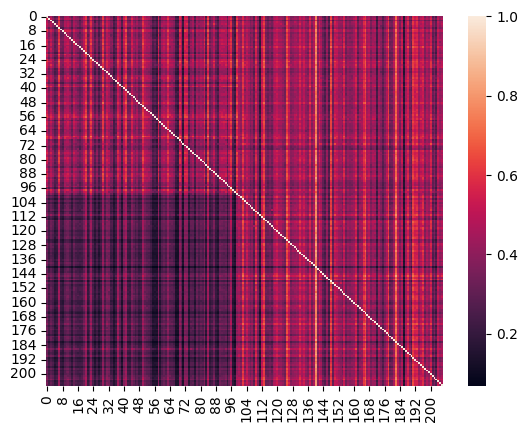

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ax = sns.heatmap(matrix)

plt.show()

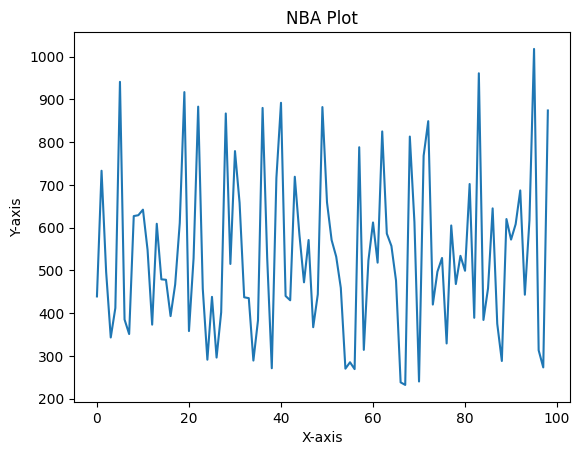

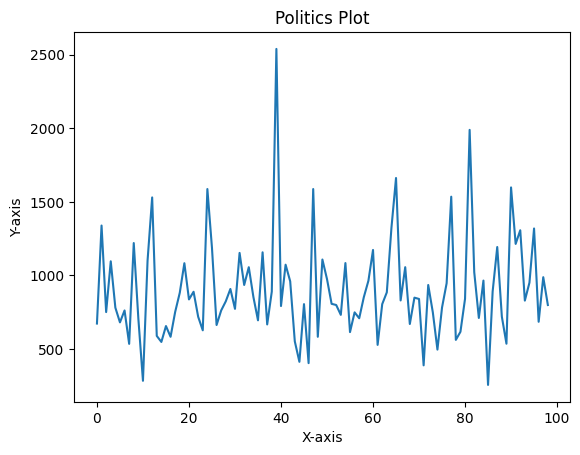

531.91
892.83
515
830


In [ ]:
import matplotlib.pyplot as plt
import statistics

nba_users_unk_counts = [bin(user).count("1") for user in _users[1:100]]
politics_users_unk_counts = [bin(user).count("1") for user in _users[101:200]]

indices = range(len(nba_users_unk_counts))
fig, ax = plt.subplots()
ax.plot(indices, nba_users_unk_counts)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('NBA Plot')

plt.show()

indices = range(len(politics_users_unk_counts))
fig, ax = plt.subplots()
ax.plot(indices, politics_users_unk_counts)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Politics Plot')

plt.show()

print(sum(nba_users_unk_counts) / 100)
print(sum(politics_users_unk_counts) / 100)

# Calculate middle values
print(statistics.median(nba_users_unk_counts))
print(statistics.median(politics_users_unk_counts))

##### Simulation setup

In [ ]:
len(bin(_users[0])[2:])

8495

In [ ]:
from numpy.random import randint

def get_random_cluster():
    token_cluster_indices = [randint(0, 10) for unk_token in all_unk_tokens]

    clusters_count = 10
    cluster_str_len = len(all_unk_tokens)
    clusters_arr = [list('0' * cluster_str_len) for i in range(clusters_count)]

    for index, token_cluster_index in enumerate(token_cluster_indices):
        clusters_arr[token_cluster_index][index] = "1"

    return list(map(lambda cluster_arr: int(''.join(cluster_arr), 2), clusters_arr))

clusters = get_random_cluster()

In [ ]:
import numpy as np

# Matching score of user x in regards to a cluster
def get_cluster_index_with_max_matching_score(_user):
  matching_scores = [matching(_user, cluser) for cluser in clusters]
  return np.argmax(matching_scores)

# Matching score of user x in regards to a cluster
def get_max_matching_score(_user, _clusters):
  matching_scores = [matching(_user, cluser) for cluser in _clusters]
  return max(matching_scores)

get_cluster_index_with_max_matching_score(_users[0])

3

In [ ]:
def get_better_distributed_clusters(min_count=0, max_count=9999):
    global clusters
    while True:
        cluster_user = [list() for i in range(10)]
        clusters = get_random_cluster()

        for index, user in enumerate(_users):
            cluster = get_cluster_index_with_max_matching_score(user)
            cluster_user[cluster].append(index)

        if min(list(map(len, cluster_user))) >= min_count and max(list(map(len, cluster_user))) <= max_count:
            return clusters, cluster_user

clusters, cluster_user = get_better_distributed_clusters(5, 60)
list(map(len, cluster_user))

[46, 14, 19, 13, 44, 8, 14, 9, 30, 10]

In [ ]:
import random

all_tokens_count = len(all_unk_tokens)

all_tokens_user_count = [0] * all_tokens_count
for user in _users:
    user_bin = "0" * (all_tokens_count - len(bin(user)[2:])) + bin(user)[2:]
    for i in range(len(user_bin)):
        all_tokens_user_count[i] += int(user_bin[i])

def get_x_tokens_not_in_cluster(_user, _cluster, x=100):
    tokens_int = _user & ~_cluster # Exists on user and not in cluster
    tokens_cut = bin(tokens_int)[2:]
    missing_leading_zeroes = all_tokens_count - len(tokens_cut)
    tokens = "0" * missing_leading_zeroes + tokens_cut

    one_indices = [i for i, val in enumerate(tokens) if val == "1" and all_tokens_user_count[i] <= 10]

    return random.sample(one_indices, min(x, len(one_indices)))

In [ ]:
import bisect

def binary_search(arr, target):
    index = bisect.bisect_left(arr, target)
    if index < len(arr) and arr[index] == target:
        return index
    else:
        return -1  # Target not found

In [ ]:
# User voing:
#       Ako naraste max matching score od matching scora njegovog clustera +1 (barem 5% veci)
#       Ako padne max matching score od matching scora njegovog clustera -1 (barem 5% manji)
# Random user predlaze 100 tokena koji nisu u njegovom clusteru (on je u clusteru get_cluster_index_with_max_matching_score(user) ) (test sa 10 tokena prvo)

import math

# Map to fetch cluster by token
def get_unk_tokens_cluster_map():
    all_tokens_count = len(all_unk_tokens)
    unk_tokens_cluster_map = [-1] * len(all_unk_tokens)
    for i, c in enumerate(clusters):
        one_indices = [j + all_tokens_count - len(bin(c)[2:]) for j, val in enumerate(bin(c)[2:]) if val == "1"]
        for index in one_indices:
            unk_tokens_cluster_map[index] = i

    return unk_tokens_cluster_map

def get_new_clusters_after_transfering_token(cluster_from_index, cluster_to_index, token_to_transfer):
    # token transition from cluster to cluster
    temp_clusters = [i for i in clusters]
    temp_clusters[cluster_from_index] = temp_clusters[cluster_from_index] - (2 ** (all_tokens_count - token_to_transfer - 1))
    temp_clusters[cluster_to_index] = temp_clusters[cluster_to_index] + (2 ** (all_tokens_count - token_to_transfer - 1))
    return temp_clusters


def user_propose_tokens(user, batch_size):
    cluster_index = get_cluster_index_with_max_matching_score(user)
    cluster = clusters[cluster_index] # User cluster

    return get_x_tokens_not_in_cluster(user, cluster, batch_size) # Tokens to transfer


def user_vote(user, token_index, unk_tokens_cluster_map, min_increase=0):
    matching_score = get_max_matching_score(user, clusters)
    cluster_index = get_cluster_index_with_max_matching_score(user)

    # TODO treba vidjet dal se glasa token po token ili jedan glas za cijeli batch

    new_clusters = get_new_clusters_after_transfering_token(unk_tokens_cluster_map[token_index], cluster_index, token_index)
    new_matching_score = get_max_matching_score(user, new_clusters)

    if new_matching_score > matching_score + min_increase:
        #print(new_matching_score - matching_score)
        return 1

    if new_matching_score < matching_score - min_increase:
        return -1

    return 0


def do_vote(user, unk_tokens_cluster_map, batch_size, min_inc):
    proposed_tokens = user_propose_tokens(user, batch_size)

    votes = [0] * len(proposed_tokens)
    for _user in _users:
        for i, proposed_token in enumerate(proposed_tokens):
            votes[i] += user_vote(_user, proposed_token, unk_tokens_cluster_map, min_inc)

    return proposed_tokens, votes

#### The simulation

In [ ]:
len(all_unk_tokens)

8502

In [ ]:
def save_clusters():
    global clusters_copy
    clusters_copy = [i for i in clusters]
save_clusters()
#unk_tokens_cluster_map = get_unk_tokens_cluster_map()
#unk_tokens_cluster_map

In [ ]:
def load_clusters():
    global clusters
    clusters = [i for i in clusters_copy]

In [ ]:
def cluster_user_status():
    cluster_user = [list() for i in range(10)]

    for index, user in enumerate(_users):
        cluster = get_cluster_index_with_max_matching_score(user)
        cluster_user[cluster].append(index)

    return list(map(len, cluster_user))

In [ ]:
def get_purities():
    purity_cluster_user = [list() for i in range(10)]

    for index, user in enumerate(_users):
        c = get_cluster_index_with_max_matching_score(user)
        purity_cluster_user[c].append(index)

    return list(map(lambda cluster: round(2 * abs(50 - sum(100 * list(map(lambda user: user <= (len(_users) / 2), cluster))) / len(cluster)), 1), purity_cluster_user))

get_purities()

[4.3, 57.1, 5.3, 38.5, 63.6, 0.0, 14.3, 33.3, 20.0, 80.0]

In [ ]:
import random

def simulation_loop(vote_batch_size, min_inc):
    global clusters
    user = random.choice(_users)
    unk_tokens_cluster_map = get_unk_tokens_cluster_map()
    tokens, votes = do_vote(user, unk_tokens_cluster_map, vote_batch_size, min_inc)

    user_cluster_index = get_cluster_index_with_max_matching_score(user)
    for i in range(len(tokens)):
        if votes[i] > 0:
            unk_tokens_cluster_map = get_unk_tokens_cluster_map()
            clusters = get_new_clusters_after_transfering_token(unk_tokens_cluster_map[tokens[i]], user_cluster_index, tokens[i])

In [ ]:
load_clusters()
print("Initial array", cluster_user_status())
for i in range(1000):
    simulation_loop(100, 0)
    print("Loop", i)
    cus = cluster_user_status()
    gp = get_purities()

    print(list(map(lambda x: " " * (5 - len(str(x))) + str(x), cus)), "Clusters over 30 users:", len(list(filter(lambda x: x > 30, cus))))
    print(list(map(lambda x: " " * (5 - len(str(x[1]))) + (str(x[1]) if cus[x[0]] > 30 else (" " * len(str(x[1])))), enumerate(gp))))
    print()

Initial array [46, 14, 19, 13, 44, 8, 14, 9, 30, 10]
Loop 0
['   46', '   14', '   20', '   15', '   43', '    8', '   13', '    6', '   27', '   15'] Clusters over 30 users: 2
['  4.3', '     ', '     ', '     ', ' 62.8', '     ', '     ', '     ', '     ', '     ']

Loop 1
['   44', '   13', '   32', '   14', '   39', '    8', '   13', '    6', '   25', '   13'] Clusters over 30 users: 3
['  4.5', '     ', ' 18.8', '     ', ' 74.4', '     ', '     ', '     ', '     ', '     ']

Loop 2
['   45', '   13', '   31', '   15', '   39', '    8', '   12', '    6', '   25', '   13'] Clusters over 30 users: 3
['  6.7', '     ', ' 22.6', '     ', ' 74.4', '     ', '     ', '     ', '     ', '     ']

Loop 3
['   44', '   13', '   39', '   14', '   38', '    7', '    9', '    7', '   25', '   11'] Clusters over 30 users: 3
['  9.1', '     ', ' 23.1', '     ', ' 73.7', '     ', '     ', '     ', '     ', '     ']

Loop 4
['   44', '   13', '   38', '   14', '   38', '    8', '    9', '    7', '  

ZeroDivisionError: ignored

In [ ]:
a = [1, 3, 2]
b = [0.1, 0.2, 0.3]
sorted(zip(a, b), key=lambda x: x[0], reverse=True)

[(3, 0.2), (2, 0.3), (1, 0.1)]

In [ ]:

# TODO Simulation Loop (barem 10*200 = 2000 ciklusa)
#
#
#
#   Ako je suma glasanja >0, prebaci taj token (optimizirati za sve tokene odjednom - batch voting)
#
#   Prati mean(max_matching_score) - MMMS i reportaj purity jer imaš labele. MMMS utječe na simulated annealing parameter

In [ ]:
all_tokens_user_count = [0] * len(all_unk_tokens)
for user in _users:
    user_bin = "0" * (len(all_unk_tokens) - len(bin(user)[2:])) + bin(user)[2:]
    for i in range(len(user_bin)):
        all_tokens_user_count[i] += int(user_bin[i])

print(all_tokens_user_count[:100])

[1, 4, 0, 2, 1, 1, 0, 148, 0, 33, 7, 1, 0, 76, 162, 3, 17, 109, 171, 2, 64, 0, 6, 2, 88, 31, 5, 24, 5, 5, 7, 1, 33, 13, 45, 0, 2, 43, 28, 141, 22, 51, 8, 0, 1, 9, 7, 13, 87, 34, 19, 46, 0, 59, 12, 10, 1, 0, 1, 32, 14, 0, 111, 6, 3, 102, 99, 12, 37, 44, 178, 5, 1, 1, 7, 12, 72, 59, 3, 0, 23, 11, 0, 4, 0, 3, 41, 2, 7, 9, 89, 20, 1, 5, 2, 0, 4, 19, 22, 134]


In [ ]:
print(">10 =", 100 * len([i for i in all_tokens_user_count if i > 10]) / len(all_tokens_user_count))
print(">50 =", 100 * len([i for i in all_tokens_user_count if i > 50]) / len(all_tokens_user_count))
print(">100 =", 100 * len([i for i in all_tokens_user_count if i > 100]) / len(all_tokens_user_count))

>10 =  34.227240649258995
>50 =  10.597506469066102
>100 =  4.222535873912021


In [ ]:
# Isklljucio sam tokene koji se ponavljaju kod vise od 10 usera
# Promjenio sam da user vote-a 10 tokena a ne 100.

# I dalje se desava da useri odu u 1 cluster
# ŠProbati pratiti puritz clustera na svaku iteraciju